Wine quality machine learning project based of winequality-white.csv dataset

**Reading data and importing all useful libraries**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import OrderedDict
import graphviz

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"





In [2]:
df1 = pd.read_csv(url,sep=';')

df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# ***Normalization of data except of Target "Quality column"***

In [0]:
def normalize_db(datas):
    normalized_X = preprocessing.normalize(datas[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

    targets = np.array(datas['quality'])

    normalized_X = np.insert(normalized_X,1, targets, axis= 1)
    df1_n = pd.DataFrame(normalized_X)
    df1_n.columns = ['fixed acidity','quality', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    cols = list(df1_n)
    cols[1],cols[11] = cols[11], cols[1]
    return df1_n.loc[:,cols]

df1_n = normalize_db(df1)

# **# Example data after normalization and some description**

In [4]:

print(df1.head(10))
df1_n.head(10)

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6
5            8.1              0.28         0.40  ...       0.44     10.1        6
6            6.2              0.32         0.16  ...       0.47      9.6        6
7            7.0              0.27         0.36  ...       0.45      8.8        6
8            6.3              0.30         0.34  ...       0.49      9.5        6
9            8.1              0.22         0.43  ...       0.45     11.0        6

[10 rows x 12 columns]


,fixed acidity,alcohol,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,0.039447,0.049590,0.001522,0.002029,0.116649,0.000254,0.253585,0.957988,0.005641,0.016906,0.002536,6.0
1,0.047267,0.071276,0.002251,0.002551,0.012004,0.000368,0.105038,0.990361,0.007458,0.024759,0.003676,6.0
2,0.078912,0.098396,0.002728,0.003897,0.067221,0.000487,0.292266,0.944992,0.009694,0.031760,0.004287,6.0
3,0.037412,0.051441,0.001195,0.001663,0.044166,0.000301,0.244214,0.966464,0.005173,0.016575,0.002078,6.0
4,0.037412,0.051441,0.001195,0.001663,0.044166,0.000301,0.244214,0.966464,0.005173,0.016575,0.002078,6.0
5,0.078912,0.098396,0.002728,0.003897,0.067221,0.000487,0.292266,0.944992,0.009694,0.031760,0.004287,6.0
6,0.044300,0.068594,0.002286,0.001143,0.050017,0.000322,0.214357,0.971750,0.007109,0.022722,0.003358,6.0
7,0.039447,0.049590,0.001522,0.002029,0.116649,0.000254,0.253585,0.957988,0.005641,0.016906,0.002536,6.0
8,0.047267,0.071276,0.002251,0.002551,0.012004,0.000368,0.105038,0.990361,0.007458,0.024759,0.003676,6.0
9,0.061012,0.082855,0.001657,0.003239,0.011298,0.000331,0.210904,0.971666,0.007486,0.024254,0.003390,6.0


In [0]:
df1_n.describe()

,fixed acidity,alcohol,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.052938,0.082692,0.002147,0.002549,0.044118,0.000342,0.242795,0.957977,0.007687,0.024655,0.003746,5.877909
std,0.023641,0.039865,0.001391,0.001363,0.034664,0.000193,0.083241,0.025555,0.003203,0.010279,0.001653,0.885639
min,0.011584,0.019940,0.000494,0.000000,0.003901,0.000075,0.023440,0.498092,0.001886,0.006533,0.001085,3.000000
25%,0.039102,0.056384,0.001397,0.001743,0.014858,0.000243,0.186024,0.946456,0.005723,0.018221,0.002655,5.000000
50%,0.048217,0.074395,0.001836,0.002304,0.037125,0.000300,0.244205,0.962100,0.007132,0.022750,0.003348,6.000000
75%,0.060690,0.098837,0.002480,0.003067,0.064741,0.000377,0.298770,0.974864,0.008783,0.028455,0.004355,6.000000
max,0.409607,0.752672,0.037080,0.020692,0.378601,0.002911,0.576778,0.997517,0.054636,0.182634,0.022803,9.000000


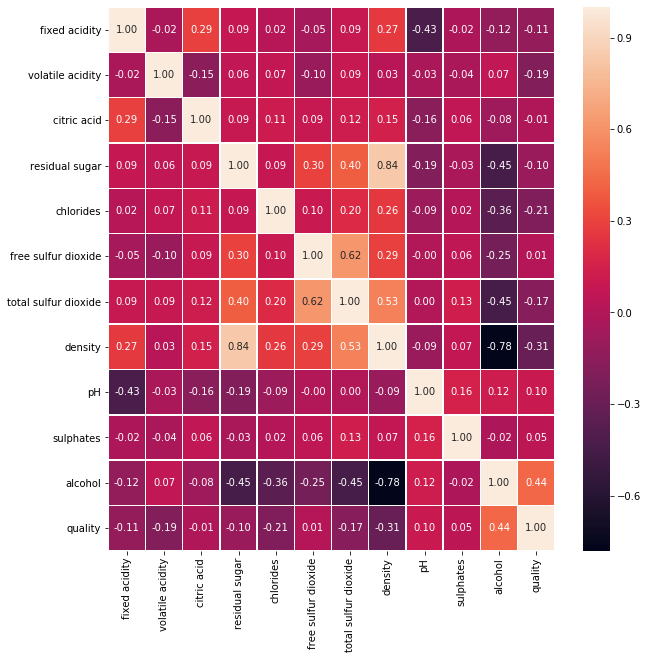

In [17]:
df1.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df1.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


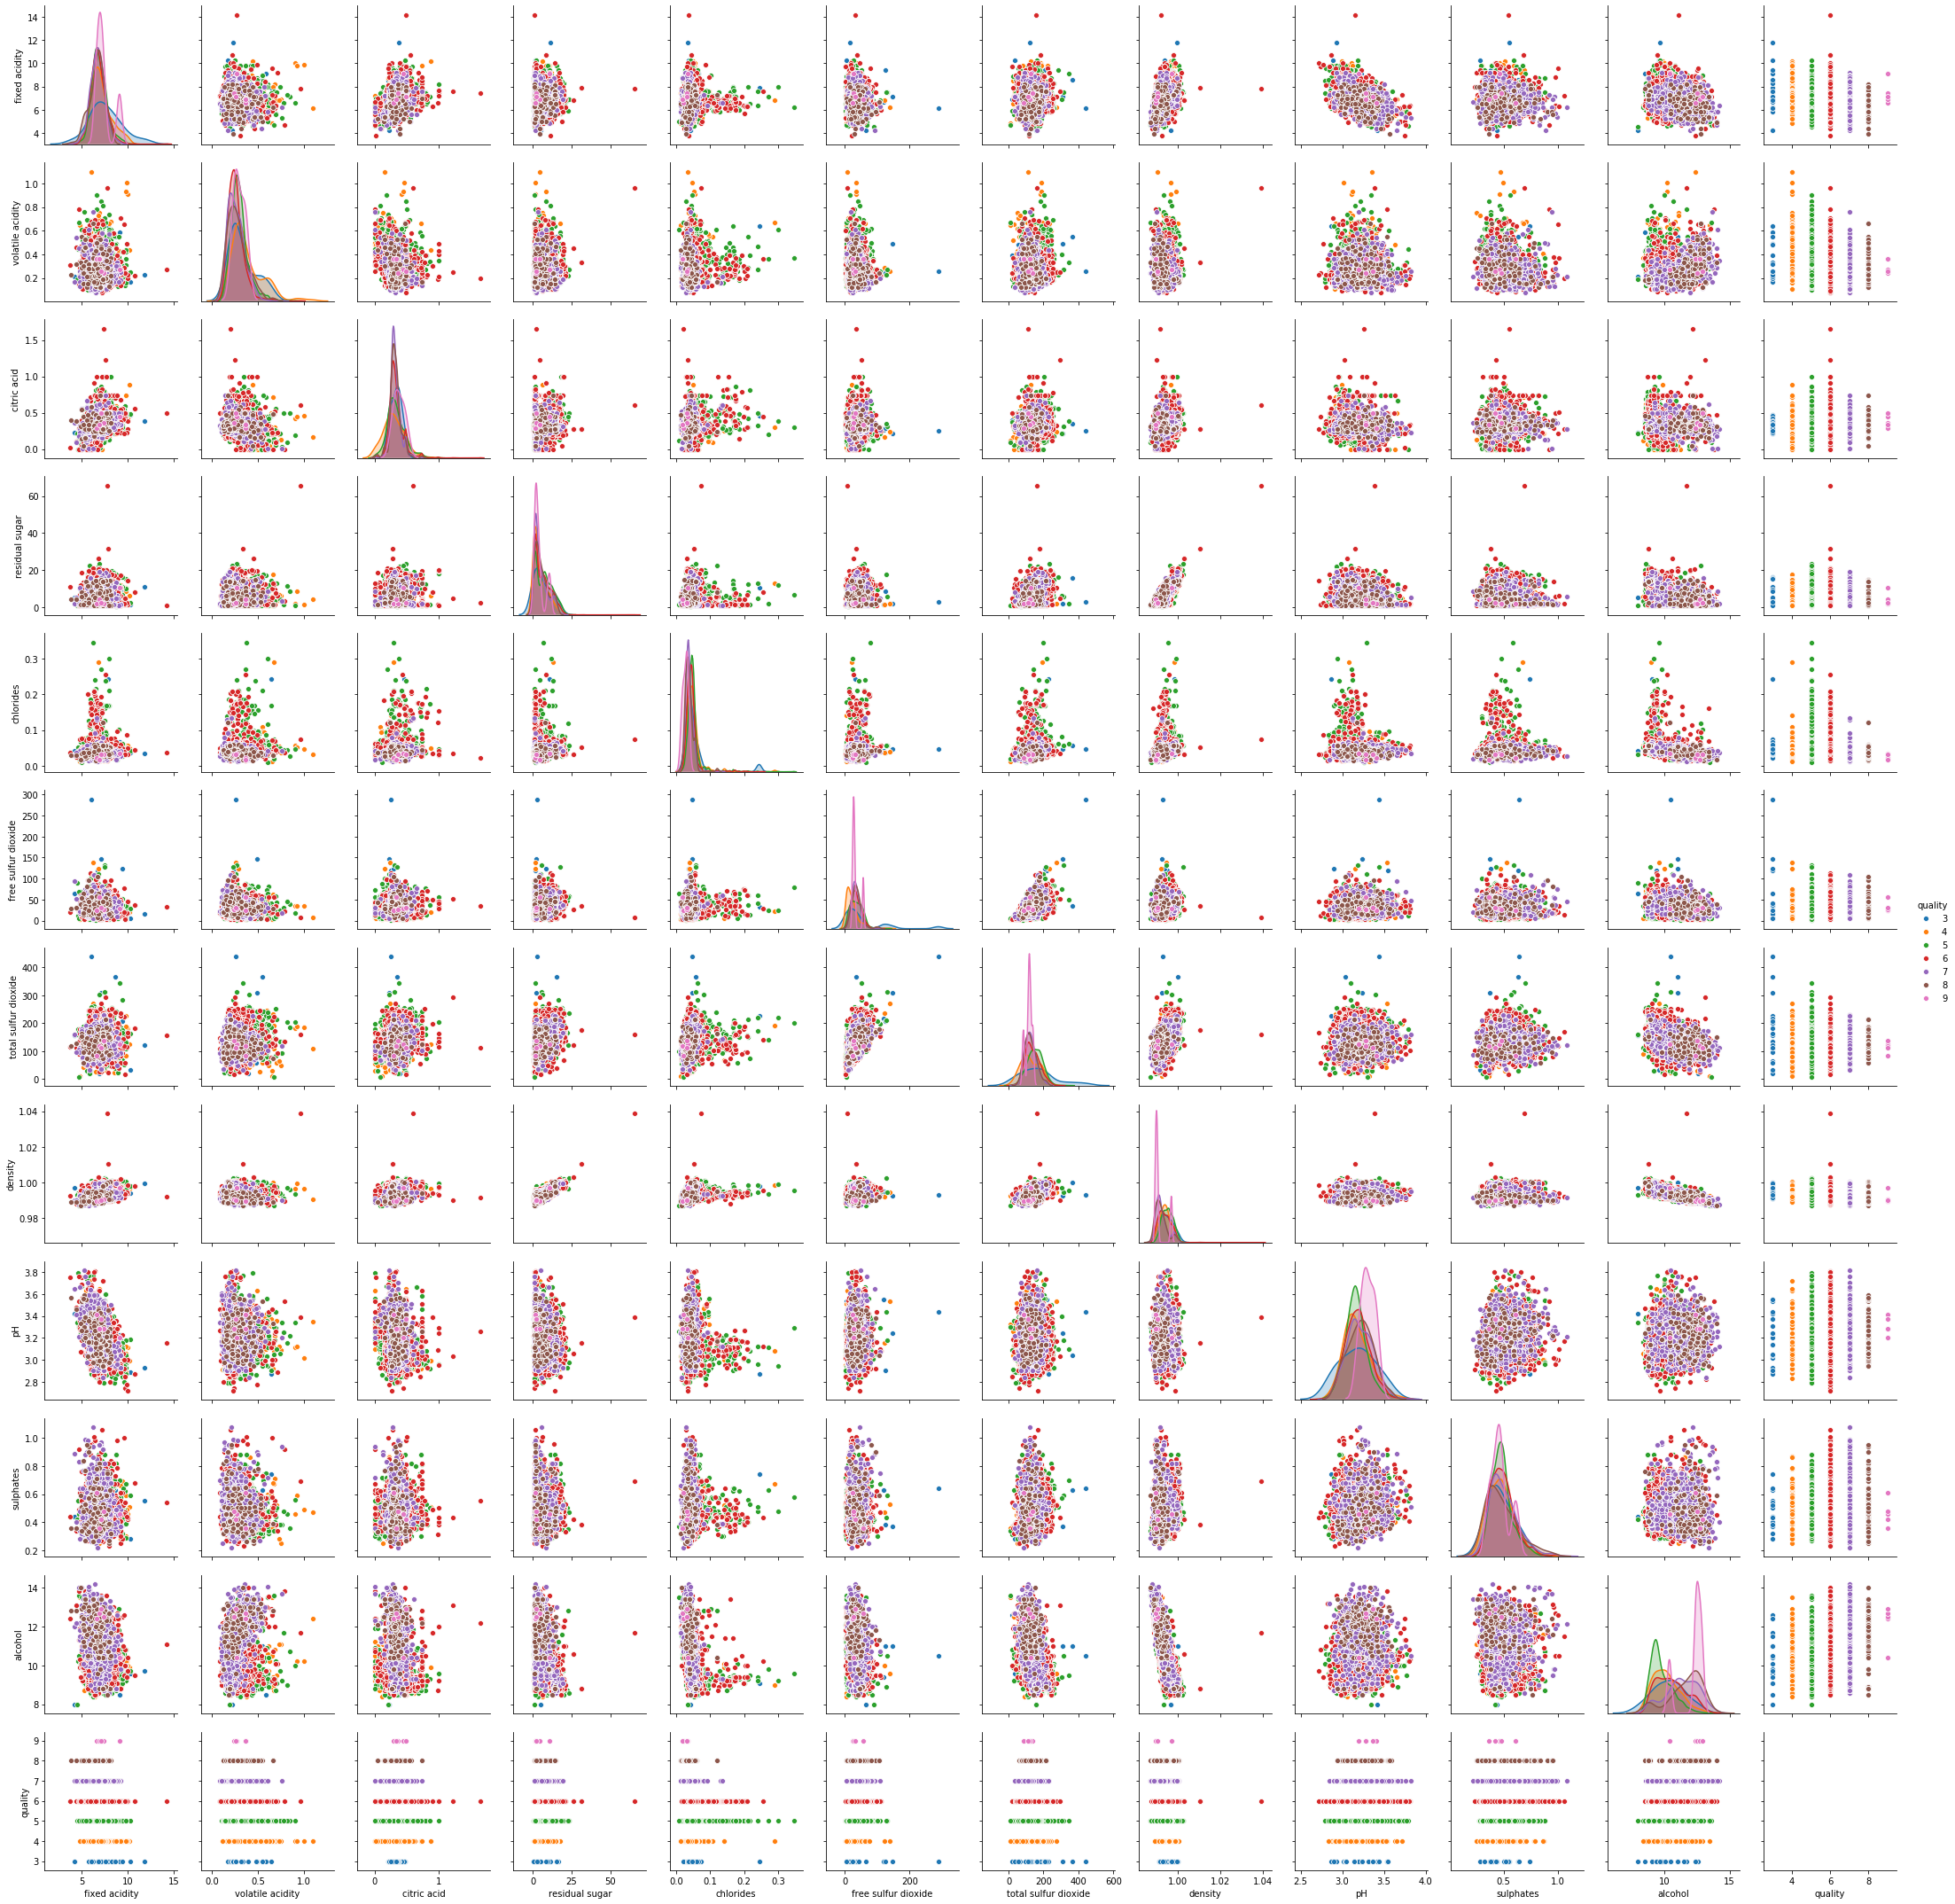

In [19]:
g = sns.pairplot(df1, hue="quality")

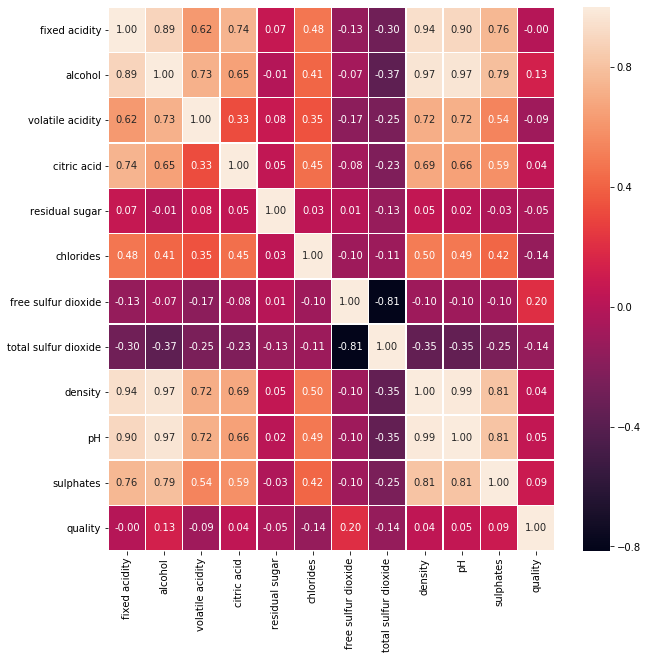

In [27]:
df1_n.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df1_n.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


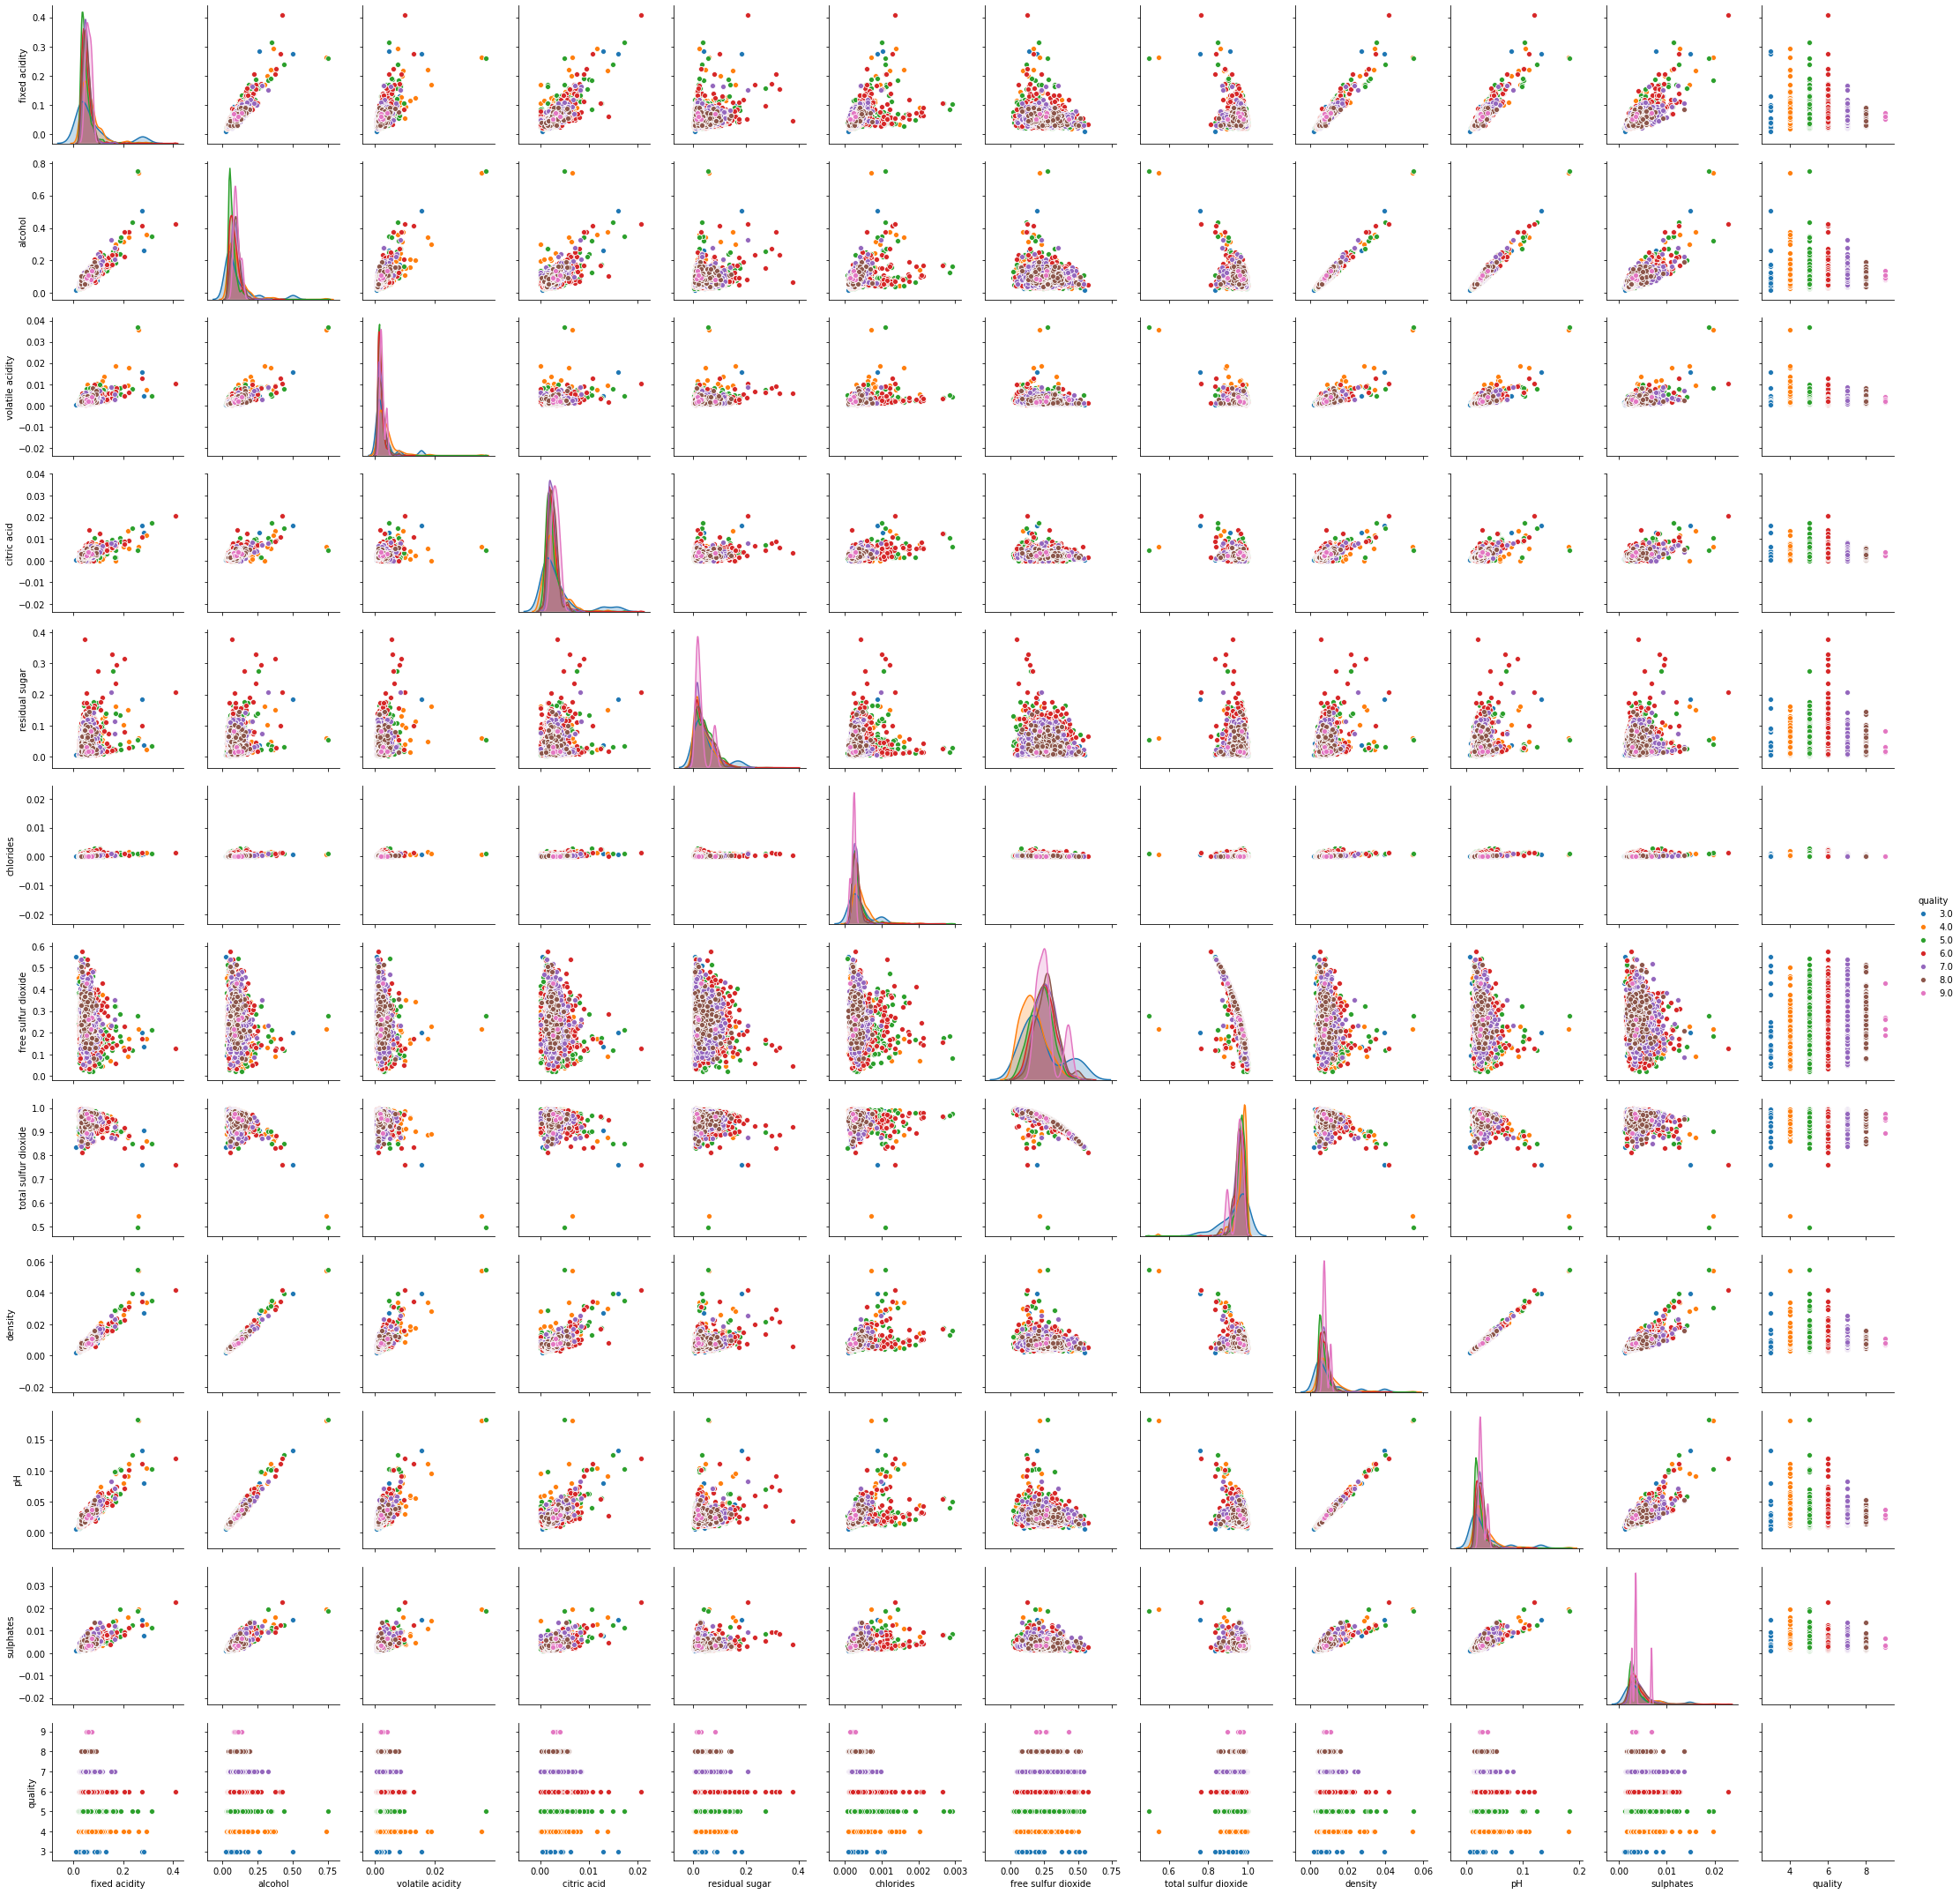

In [28]:
g = sns.pairplot(df1_n, hue="quality")

In [0]:
train_data, test_data = np.split(df1,[len(df1)*7//10])
test_data = test_data.drop(labels='quality', axis=1)


In [0]:
train_datan, test_datan = np.split(df1_n,[len(df1_n)*7//10])
test_datan = test_datan.drop(labels='quality', axis=1)

***First classification method KNN (k-Nearest Neighbors)***

In [0]:
def KNN(train_X, train_Y, test_X, ks):
  
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)
   
    preds = {}
    
    first = 2*np.matmul(train_X,test_X.transpose())
    second = (train_X**2).sum(axis=1).reshape(-1,1)
    third = (test_X**2).sum(axis=1).reshape(1,-1)
    distance = -first + second + third
          
    closest = distance.argsort(axis=0)  
    targets = train_Y[closest]

           
    for k in ks:
        predictions = sstats.mode(targets[:k],axis=0)[0]


        predictions = predictions.ravel()
        preds[k] = predictions

    return preds

In [0]:
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3428,6.4,0.32,0.27,4.90,0.034,18.0,122.0,0.99160,3.36,0.71,12.5
3429,7.1,0.18,0.39,14.50,0.051,48.0,156.0,0.99947,3.35,0.78,9.1
3430,7.1,0.17,0.40,14.55,0.047,47.0,156.0,0.99945,3.34,0.78,9.1
3431,7.1,0.18,0.39,15.25,0.047,45.0,158.0,0.99946,3.34,0.77,9.1
3432,7.8,0.29,0.29,3.15,0.044,41.0,117.0,0.99153,3.24,0.35,11.5
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [0]:

train_x = np.array(train_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
train_y = np.array(train_data['quality'])

unknown_x = np.array(test_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

preds_knn = KNN(train_x, train_y, unknown_x, np.arange(1,13,2).tolist())

In [0]:
train_x = np.array(train_datan[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
train_y = np.array(train_datan['quality'])

unknown_x = np.array(test_datan[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
preds_knnn = KNN(train_x, train_y, unknown_x, np.arange(1,13,2).tolist())

# **Diffrances between normal database and normalized database in KNN**

In [10]:
cnt = 0 
class_nn_dict = {}
class_n_dict = {}
for i in zip(preds_knn[11],preds_knnn[11]):
    if i[0] not in class_nn_dict:
        class_nn_dict[i[0]] = 0
    else :
        class_nn_dict[i[0]] += 1
    if i[1] not in class_n_dict:
        class_n_dict[i[1]] = 0
    else :
        class_n_dict[i[1]] += 1
    if i[0] != i[1]:
        cnt +=1

print("Diffrance rate = {}".format(cnt/len(unknown_x)))

for x,y in class_nn_dict.items(): 
    print("Class {} has {} entries without normalization ".format(x,y))
for x,y in class_n_dict.items(): 
    print("Class {} has {} entries with normalization ".format(x,y))
class_nn_dict = OrderedDict(sorted(class_nn_dict.items()))
class_n_dict = OrderedDict(sorted(class_n_dict.items()))


Diffrance rate = 0.44285714285714284
Class 6 has 817 entries without normalization 
Class 5 has 416 entries without normalization 
Class 7 has 226 entries without normalization 
Class 4 has 7 entries without normalization 
Class 6.0 has 781 entries with normalization 
Class 7.0 has 285 entries with normalization 
Class 5.0 has 379 entries with normalization 
Class 4.0 has 7 entries with normalization 
Class 8.0 has 13 entries with normalization 


# ***Distribution of quality ratings***

odict_keys([4.0, 5.0, 6.0, 7.0, 8.0])


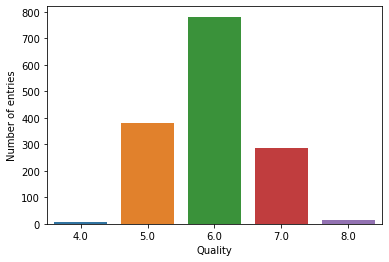

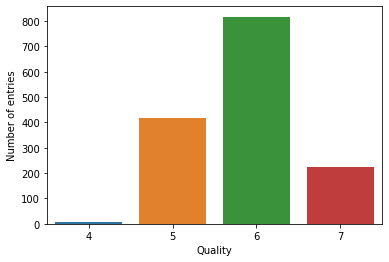

OrderedDict([(4.0, 7), (5.0, 379), (6.0, 781), (7.0, 285), (8.0, 13)])


[4.0, 5.0, 6.0, 7.0, 8.0]

In [26]:
print(class_n_dict.keys())
for i in [class_n_dict,class_nn_dict]:
    sns.barplot(list(i.keys()), list(i.values()))
    plt.xlabel("Quality")
    plt.ylabel("Number of entries") 
    plt.show()


In [0]:
def cdon(predictions):  
    quality_diffs = []
    for x,y in predictions.items():
        quality_diffs.append(y.tolist())

    quality_diffs = np.asarray(quality_diffs)

    quality_diffs = quality_diffs.T

    cnt = np.zeros(len(quality_diffs[0])) 
    for k_class in quality_diffs:
        for i in range(len(k_class)-1):     
            if k_class[i] != k_class[i+1]:
                cnt[i] += 1

    y = cnt / quality_diffs.shape[0]

    plt.plot(np.arange(1,13,2), y[0:len(y)], c = "orange" )

    plt.scatter(np.arange(1,13,2), y[0:len(y)])
    plt.ylim([0, 1])
    plt.show()



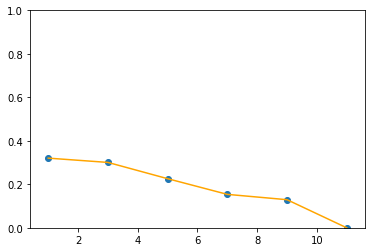

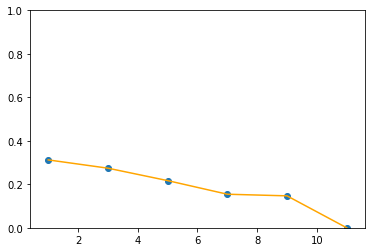

In [13]:
cdon(preds_knn)
cdon(preds_knnn)


# **Classyfing test data with SKLearn KNN**

In [0]:
x = np.array(train_datan[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
y = np.array(train_datan['quality'])

unknown_x = np.array(test_datan[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])


neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x, y)
classes = neigh.predict(unknown_x)




# **Our's KNN algorithm and sklearn's comparison**

In [29]:
x = np.array(train_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
y = np.array(train_data['quality'])

unknown_x = np.array(test_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

clf = DecisionTreeClassifier(random_state=0).fit(x,y)

print(clf.feature_importances_)

[0.06851047 0.1172255  0.07889373 0.08088183 0.06331577 0.0879158
 0.09036579 0.09127885 0.09733811 0.08689888 0.13737528]
